<b style="color:green;">  2018 Midterm Election Prediction Model Report<b>

<b style="color:green;"> By Zohd Khan <b> 

In this personal project, I used 2 public datasets from the Harvard Dataverse to create a <b>Gradient Boosting Classifier</b> that predicts 
the <b>most dominant</b> political affiliation in each county of the United States during the 2018 midterm elections. In this context, dominance is defined by the party whose candidates recieved the most votes across all precincts in each county.

The different political affiliations that the Gradient Boosting Classifier differentiates between are <b>Democratic, Republican, Nonpartisan, and Other</b>. 

Aside from serving as personal practice, this project demonstrates how Data Science techniques can be leveraged to make nuanced classifications with reasonable accuracy levels. Right below each code cell, I provide <b>analysis and insight</b> into how each step helped in the development of the final model. 

The sources for the 2 datasets are given below:

- [State Precinct-Level Returns 2018](https://dataverse.harvard.edu/dataverse/2018_precincts)
- [U.S General Elections 2018 Analysis Dataset](https://electionlab.mit.edu/data)

&nbsp;&nbsp;

<b style="color:green;"> 2018 Data Loading and Processing<b>

In [32]:
#Zohd Khan
#https://dataverse.harvard.edu/dataverse/2018_precincts
#https://electionlab.mit.edu/data
#https://github.com/MEDSL/2018-elections-unoffical/blob/master/election-context-2018.md

#Importing neccesary modules
import pandas as pd
import numpy as np

#Reading file path for the first table, which contains 2018 Midterm Election Data
file_path1 = "C:/Users/Zohd/OneDrive/Desktop/Personal Project/STATE_precinct_general.csv"

#Reading the 2018 Midterm Election Data into dataframe "election_data", and adjusting data types for columns that initially contain mixed data types.
election_data = pd.read_csv(file_path1, dtype = {
    'precinct':str, 
    'party_detailed':str, 
    'party_simplified':str, 
    'district':str, 
    'writein':pd.BooleanDtype()
})

#Subsetting "election_data" dataframe to only include neccesary columns
relevant_columns = ['county_fips','party_simplified','mode','special']
election_data = election_data[relevant_columns]


#print(election_data['party_simplified'].isnull().sum()/len(election_data))

#Simply removing NA values using .dropna() because there aren't many NA values left in the dataframe, so the cost of removal is minimal
election_data.dropna(inplace = True) 

#Grouping/Aggregating based on each county to match the granularity of the "past_data" table
election_data = election_data.groupby('county_fips').agg({
    'county_fips':'min', #Applying min() function since any value, including first, can be taken
    'party_simplified':lambda x: x.mode().iloc[0] if not x.empty else np.nan,
    'mode':lambda x: x.mode().iloc[0] if not x.empty else np.nan, # Extracts the most common form of voting from "mode" column for each county
    'special':'max' # Captures any special cases of elections per county
})

#Resetting index to clarify to pandas that 'county_fips' is a column, as it mistakenly identified as an index after applying aggregration step
election_data.reset_index(drop = True,inplace = True)

print(election_data)


      county_fips party_simplified   mode  special
0          1001.0       REPUBLICAN  TOTAL    False
1          1003.0       REPUBLICAN  TOTAL    False
2          1005.0       REPUBLICAN  TOTAL    False
3          1007.0       REPUBLICAN  TOTAL    False
4          1009.0       REPUBLICAN  TOTAL    False
...           ...              ...    ...      ...
2923      56037.0       REPUBLICAN  TOTAL    False
2924      56039.0       REPUBLICAN  TOTAL    False
2925      56041.0       REPUBLICAN  TOTAL    False
2926      56043.0       REPUBLICAN  TOTAL    False
2927      56045.0       REPUBLICAN  TOTAL    False

[2928 rows x 4 columns]


In the first code cell, I loaded 2018 Midterm Election Data into a Dataframe and then subsetted the necessary columns, namely the County FIPS codes and the dominant party (label). I then aggregated each of the subsetted columns to county-level granularity to match the granularity of the second dataset, which enables the subsequent merging of dataframes.

&nbsp;&nbsp;

<b style="color:green;"> Past Demographic Data Loading/Processing and DataFrame Merging<b>

In [33]:
#Loading second table, which provides details related to elections before the 2018 midterm elections
file_path2 = "C:/Users/Zohd/OneDrive/Desktop/Personal Project/election-context-2018.csv"
past_data = pd.read_csv(file_path2)

print(past_data.columns)
#Creating subset of "past_data", which consists of variables assumed to provide insight into "party_simplified". Further Feature Engineering will
#take place after further insight is made through EDA

#necessary_columns = ['fips', 'demhouse16','rephouse16','otherhouse16', 'demsen16','repsen16','othersen16','trump16','clinton16','otherpres16', 'obama12', 'otherpres12','repgov14', 'demgov14', 'othergov14','white_pct','age65andolder_pct','age29andunder_pct','median_hh_inc']
necessary_columns = ['fips', 'demhouse16','rephouse16','otherhouse16', 'demsen16','repsen16','othersen16','trump16','clinton16','otherpres16','romney12', 'obama12', 'otherpres12','repgov14', 'demgov14', 'othergov14','white_pct','age65andolder_pct','age29andunder_pct','median_hh_inc','female_pct','foreignborn_pct']
past_data = past_data[necessary_columns]
past_data.dropna(inplace = True)

#Renaming 'fips' to 'county_fips' in "past_data"  to match with the name for Fips codes column in "election_data" 
past_data.rename(columns = {'fips':'county_fips'}, inplace = True)
#Performing 
combined_data = pd.merge(election_data, past_data, how = 'inner', on = 'county_fips')

Index(['state', 'county', 'fips', 'trump16', 'clinton16', 'otherpres16',
       'romney12', 'obama12', 'otherpres12', 'demsen16', 'repsen16',
       'othersen16', 'demhouse16', 'rephouse16', 'otherhouse16', 'demgov16',
       'repgov16', 'othergov16', 'repgov14', 'demgov14', 'othergov14',
       'total_population', 'cvap', 'white_pct', 'black_pct', 'hispanic_pct',
       'nonwhite_pct', 'foreignborn_pct', 'female_pct', 'age29andunder_pct',
       'age65andolder_pct', 'median_hh_inc', 'clf_unemploy_pct', 'lesshs_pct',
       'lesscollege_pct', 'lesshs_whites_pct', 'lesscollege_whites_pct',
       'rural_pct', 'ruralurban_cc'],
      dtype='object')


In this second code cell, I essentially repeated the same steps as in the first cell, but this time, I loaded and subsetted the past election data. I initially subsetted columns that I hypothesized would serve as good predictors (features) of my label (party_simplified), but I changed some variables in the final model upon gaining further insight.

I then performed an inner join/merge on the two cleaned dataframes based on the 'county_fips' column. This basically combines the corresponding rows of both dataframes where the same County FIPS code is present. 

Having a new, combined dataframe eases the process of data visualization and feature building that is displayed in the upcoming steps. 

&nbsp;&nbsp;
    
<b style="color:green;"> Data Visualization<b>

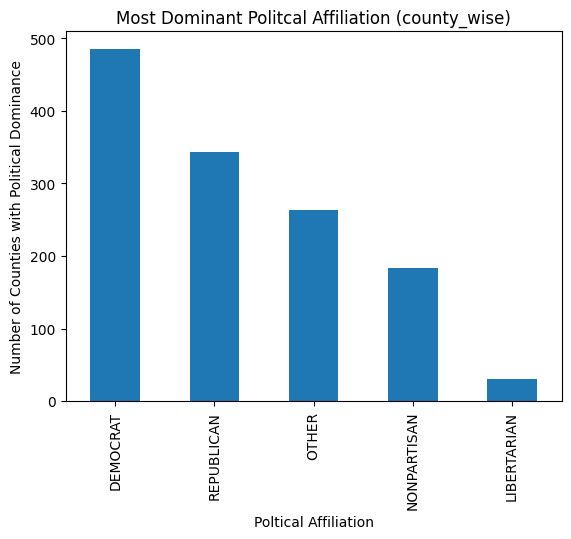

party_simplified
DEMOCRAT       37.164751
REPUBLICAN     26.283525
OTHER          20.153257
NONPARTISAN    14.099617
LIBERTARIAN     2.298851
Name: count, dtype: float64


In [34]:
#Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt #Importing matplotlib to plot the data

#Applying value_counts() to obtain distribution of target variable, "party_simplified"
party_dist = combined_data['party_simplified'].value_counts()
party_dist.plot(kind = 'bar') #creating a bar chart to more easily visualize the distribution
plt.title('Most Dominant Politcal Affiliation (county_wise)')
plt.xlabel('Poltical Affiliation')
plt.ylabel('Number of Counties with Political Dominance')
     
plt.show()
#Getting percentage of how much each party distribution makes up of total
category_percentages = party_dist / len(combined_data) * 100
print(category_percentages) 



In this next cell, I used the "value_counts" function from Pandas to better understand the distribution of the categories in my label. Although this code appears rather simple, it is extremely insightful since I learned that the Libertarian category contained a <b>small number of observations</b>, making it both inconvenient and insignificant for me to predict. Hence, I later decided to place the Libertarian observations into the "Other" category to help improve model accuracy while still maintaining the complexity of a <b>multiclass classification problem.</b>

&nbsp;&nbsp;

<b style="color:green;"> Correlation Analysis<b>

      trump16  clinton16  otherpres16  romney12  obama12  otherpres12
0       18172       5936          865     17379     6363          190
1       72883      18458         3874     66016    18424          898
2        5454       4871          144      5550     5912           47
3        6738       1874          207      6132     2202           86
4       22859       2156          573     20757     2970          279
...       ...        ...          ...       ...      ...          ...
1300   142521      79200        17321    162798    78779         2279
1301    16189       8440         1395     17002    11578          260
1302     7669       3792          538      6562     5335          151
1303    43448      37054         6642     42122    45449         1602
1304    21503      14232         2065     19704    18581          615

[1305 rows x 6 columns]


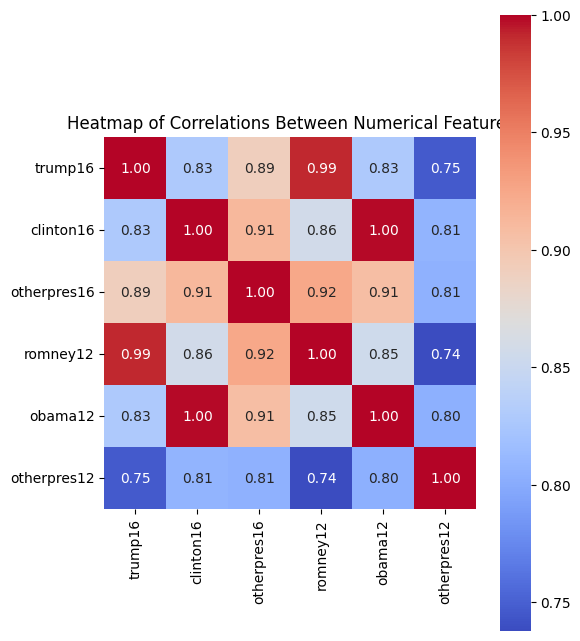

party_simplified
DEMOCRAT       485
REPUBLICAN     343
OTHER          293
NONPARTISAN    184
Name: count, dtype: int64


In [35]:
#Highly correlated features can be combined to produce more insightful interaction terms
import seaborn as sns #importing seaborn for the sake of the heatmap

#Selecting only the numerical (int) features using the "select_dtypes" function from pandas
numerical_features = combined_data.select_dtypes(include = [int]).copy()

print(numerical_features)
#Using "corr" function to obtain the correlation matrix of the numerical features
correlation_matrix = numerical_features.corr()

#print(correlation_matrix)
#Initialiing figure size with 6 width and 8 length
plt.figure(figsize = (6,8))

#Creating a heatmap based on the correlation matrix with the appropriate aesthetics for easy viewing
sns.heatmap(correlation_matrix, annot = True, fmt = ".2f",cmap = 'coolwarm',square = 'True')

plt.title('Heatmap of Correlations Between Numerical Features')
plt.show() 

#Creaing another variable containing only the integers and floats from the main dataframe for the purpose of the heatmap
numerical_features = combined_data.select_dtypes(include = [int,float]).copy()

#Placing Libertarian category into "other" category of party_simplified variable because former is too small
combined_data['party_simplified'] = combined_data['party_simplified'].replace({'LIBERTARIAN':'OTHER'})

#Checking value counts to observe if the replace function worked
print(combined_data['party_simplified'].value_counts())

#assigninged the numerical_features subset with the change that was just made to the combined_data dataframe
numerical_features['party_simplified'] = combined_data['party_simplified']

#sns.pairplot(numerical_features,diag_kind = 'hist', hue = 'party_simplified')


#Based on the pairplot, it is apparent that distributions of the numerical features are distributed in different ways: 
# Right skew dist is most prevalent, and should be treated with a log transformation to reduce the skewness
# A few are left skewed, and this should be treated with reverse log transformation 



In the above code cell, I created a heatmap for the purpose of examining the correlation levels between some of the major numerical features in my dataset. 

Typically, highly correlated features can be combined together to form <b>interaction terms</b>, which have the potential to increase model performance substantially. 

However, my attempts at creating interaction terms did not result in increased model performance. 

Nonetheless, performing a correlation analysis using a heatmap can still provide valuable insight into the nature of your numerical features.

&nbsp;&nbsp;

<b style="color:green;"> Final Model<b>

In [36]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler #Importing these to convert categorical variables to a numerical format
from sklearn.model_selection import train_test_split #importing to randomly split the data into train and test sets
#from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier #Importing Gradient Boosting Algorithm to classify
from sklearn.metrics import accuracy_score, classification_report #Importing functions to calculate accuracy and detailed classification report
from sklearn.model_selection import cross_val_score #Importing cross_val_score to perform 5 fold cross validation

#Creating interaction terms out of factors that are about universally correlated with one another
#combined_data['romney12_trump16'] = combined_data['romney12']*combined_data['trump16']
#combined_data['obama12_clinton16'] = combined_data['obama12']*combined_data['clinton16']


#Initializing OneHotEncoder to convert categorical variables "mode" and "special" to numericals for purpose of model acceptance
ohe = OneHotEncoder()
cat_encoded = ohe.fit_transform(combined_data[['mode','special']])

cat_encoded_df = pd.DataFrame(cat_encoded.toarray(),
                              columns = ohe.get_feature_names_out(['mode','special']),
                              index = combined_data.index)


#Chosen columns to serve as  numerical model features (use double brackets to make "features" dataframe rather than series)
numerical_features = combined_data[['otherhouse16','rephouse16','demhouse16','demsen16','repsen16','othersen16','trump16','clinton16','otherpres16','obama12','romney12', 'otherpres12','othergov14', 'repgov14', 'demgov14','white_pct','age65andolder_pct','age29andunder_pct','median_hh_inc','foreignborn_pct']]
features = pd.concat([numerical_features,cat_encoded_df], axis = 1)

#combined_data['party_simplified'] = combined_data['party_simplified'].replace({'LIBERTARIAN':'OTHER'})

X = features
y = combined_data['party_simplified'] 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 ,random_state = 7)

#Applying Z-Score Standardization to greatly right-skewed features, which is practically all chosen features. Many "0" values
# in house columns with some outliers, and other features can be standardized to ensure they contribute equally to model
standardizer = StandardScaler()
X_train_scaled = standardizer.fit_transform(X_train) #"fit_transform" to scale training data based on computed mean and SD
X_test_scaled = standardizer.transform(X_test) #"transform" to apply "same rules" as training data

model = GradientBoostingClassifier(random_state = 19)

cv_scores = cross_val_score(model, X_train_scaled, y_train, cv = 5)
print("CV Scores:", cv_scores)
print("Average CV Score:", cv_scores.mean())

model.fit(X_train_scaled,y_train)
predictions = model.predict(X_test_scaled)
print(classification_report(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))


CV Scores: [0.79425837 0.78947368 0.79425837 0.84210526 0.80288462]
Average CV Score: 0.804596061832904
              precision    recall  f1-score   support

    DEMOCRAT       0.81      0.89      0.85        96
 NONPARTISAN       0.64      0.67      0.65        27
       OTHER       0.92      0.80      0.86        60
  REPUBLICAN       0.82      0.79      0.81        78

    accuracy                           0.82       261
   macro avg       0.80      0.79      0.79       261
weighted avg       0.82      0.82      0.82       261

Accuracy: 0.8160919540229885


In this final code cell, I undertook several crucial steps before initializing my final model. 

First, I applied a technique known as <b>One Hot Encoding</b> to convert my categorical features to a numerical format, specifically consisting of 0s and 1s for each variable. 

After then putting all of my features in my X variable and performing a standard random split of my data, I also applied <b>Z-score standardization</b> to my all of my features as most of them were severely skewed to the right. 

I then initialized a Gradient Boosting Classifier, and then did an initial run of my model using <b>5-fold Cross-validation</b>, before finally training and predicting the final model. 

&nbsp;&nbsp;

<b style="color:green;"> Final Results<b>

    

My Cross-validation resulted in an average accuracy of approximately 80\% across all folds, with each fold's score being  fairly close to one another. 

Furthermore, my Test set accuracy of approximately <b>82\%</b> is close to my Cross-validation average, ensuring that my model is not overfitting significantly.

The Test set accuracy level is <b> reasonable </b>, especially considering that the model is tasked with differentiating between 4 different categories. 

However, <b>one clear issue</b> with the results can be seen from the Classification report, where <b>all</b> the metrics for the Nonpartisan category <b>are worse</b> than those of the other categories.

For now, I am satisfied with the results, but I could perform more exploratory data analysis in the future to fix this issue. 
